In [83]:
import numpy as np

import re 
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from scipy import optimize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

import string
from scipy.io import loadmat
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Lales\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


In [6]:
for message_no, message in enumerate(messages[:3]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's




In [7]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)
messages.sort_values(by='length' ,ascending=False)

,label,message,length
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
...,...,...,...
3376,ham,:),3
5357,ham,Ok,2
4498,ham,Ok,2
1925,ham,Ok,2


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

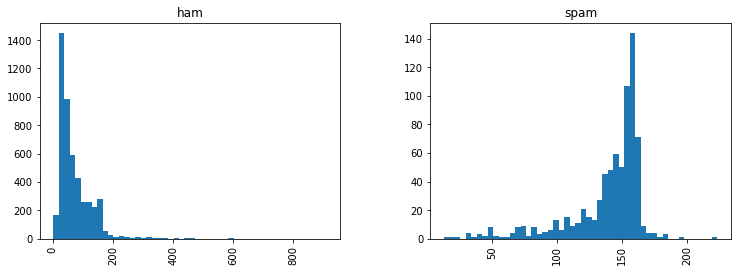

In [19]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

### Text Pre-processing

In [17]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Train Test Split

In [77]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

### Creating a Data Pipeline

In [78]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', GridSearchCV(SVC(),param_grid={'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001],
                                                  'kernel': ['sigmoid']} ,refit=True,verbose=3))
])

In [79]:
pipeline.fit(msg_train,label_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.873 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.873 total time=   0.3s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.875 total time=   0.3s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.875 total time=   0.3s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.875 total time=   0.3s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.867 total time=   0.3s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.867 total time=   0.3s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.868 total time=   0.3s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.868 total time=   0.3s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.866 total time=   0.3s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.867 total time=   0.2s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.978 total time=   0.2s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.963 total time=   0.2s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.970 total time=   0.2s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.974 total time=   0.2s
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.979 total time=   0.3s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.979 total time=   0.3s
[CV 3/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.967 total time=   0.3s
[CV 4/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.981 total time=   0.3s
[CV 5/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.975 total time=   0.3s
[CV 1/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.980 total time=   0.3s
[CV 2/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.979 total time=   0.3s
[CV 3/5] END C=1000, gamma=0.01, kernel=sigmoid;, score=0.971 total time=   0.3s
[CV 4/5] END C=1000, gamma=0

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021A1D8CD828>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100, 1000],
                                          'gamma': [1, 0.1, 0.01, 0.001,
                                                    0.0001],
                                          'kernel': ['sigmoid']},
                              verbose=3))])

In [80]:
predictions = pipeline.predict(msg_test)

In [85]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       961
        spam       0.97      0.91      0.94       154

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [86]:
print(confusion_matrix(label_test,predictions))

[[956   5]
 [ 14 140]]
